# Clasificación de frutas
## Especificaciones técnicas
Todos los entrenamientos de modelos de Deep Learning realizados en este cuaderno han sido realizados con una targeta gráfica **NVIDIA RTX 4060**.
Versiones de librerías clave:
  - Tensorflow: 2.10
  - CUDA: 11.2
  - cuDDN: 8.2
## Dataset

Conjunto de 10.000 imágenes pertenecientes a diferentes tipos de fruta.

Cabe destacar que somos conocedores de la estructuración de carpetas de nuestro dataset, esta es la siguiente: <br>
```bash
FruitsClassification/
│           
├── train/
│   │── clase1/
│   │    ├── imagen1
│   │    ├── imagen2
│   │    └── ...
│   │── clase2/
│   .  ├── imagen1
│   .    ├── imagen2
│        └── ...
├── valid/
│   │── clase1/
│   │    ├── imagen1
│   │    ├── imagen2
│   │    └── ...
│   │── clase2/
│   .   ├── imagen1
│   .   ├── imagen2
│       └── ...
└── test/
    │── clase1/
    │    ├── imagen1
    │    ├── imagen2
    │    └── ...
    │── clase2/
    .   ├── imagen1
    .   ├── imagen2
        └── ...
```
Como se puede apreciar en la estuctura de carpetas definida contamos con 3 carpetas diferentes (datasets):
- La primera para la etepa de **entrenamiento** del modelo.
- La segunda para la etapa de **validación** del modelo.
- La tercera y última para realizar predicciones con nuestro modelo ya entrenado y **testearlo**.

Cada una de estas carpetas cuenta con una carpeta por cada clase a clasificar que a su misma vez contienen imagenes de la propia clase.
  
## Objetivo

Seleccionar un modelo y arquitectura CNN apropiada para lograr una buena clasificación de imágenes del dataset propuesto.

Las imágenes del conjunto de datos presentan diversas formas, tamaños y colores, y se han capturado en diferentes condiciones de iluminación.

El modelo de Deep Learning de clasificación a desarrollar puede utilizarse en aplicaciones prácticas, como la clasificación de frutas en la industria agrícola.


## Análisis exploratorio de datos (EDA)
Al tratarse de imágenes, no podemos realizar el mismo EDA que realizariamos sobre un dataset que contiene datos numéricos o categóricos. <br>
Hay diferentes características de un conjunto de imágenes que conviene explorar para conocer nuestros datos y actuar en consecuencia para el entrenamiento de nuestro modelo. <br>
En este EDA repasaremos estos puntos clave:
- ✅ Distribución de clases.
- ✅ Visualización de muestras aleatorias.
- ✅ Dimensiones y formatos de imágenes.
- ✅ Estadísticas de color.
- ✅ Imágenes corruptas

### Importación de librerías necesarias para el EDA

In [1]:
# Importar librerías
import matplotlib.pyplot as plt # Gráficos
import numpy as np # Operaciones matemáticas
import os # Interacción con el sistema operativo
import pandas as pd # Análisis y manipulación de datos
import random # Generación de números aleatorios
from PIL import Image # Manipulación de imágenes

###  Distribución de Clases
Verificamos el número de clases por dataset y el número de imágenes de cada clase en los mismos.

In [190]:
# Rutas de los datasets
dataset_paths = {
    'Entrenamiento': 'Fruits Classification/train',
    'Validación': 'Fruits Classification/valid',
    'Testeo' : 'Fruits Classification/test'
                 }

# Recorre el diccionario que contiene las rutas de los datasets
for dataset_name, dataset_path in dataset_paths.items():
    print(15 * '-' + dataset_name + 15 * '-')
    # Lista para guardar las clases de cada dataset
    clases = []
    # Contador de imágenes por dataset
    ds_total_images = 0
    # Recorre el directorio que contiene las carpetas de imagenes, iterando sobre los ficheros/directorios
    for clase in os.listdir(dataset_path):
        # Establece la ruta hasta la carpeta de la iteración actual
        ruta_clase = os.path.join(dataset_path, clase)
        # Comprueba si el elemento actual es un directorio
        if os.path.isdir(ruta_clase):
            # Añade el nombre del directorio a la lista de clases
            clases.append(clase)
            # Suma el número de imágenes encontradas en la clase
            ds_total_images += len(os.listdir(ruta_clase))
            # Imprime el nombre de la clase y el numero de imagenes que contiene
            print(f"{clase}: {len(os.listdir(ruta_clase))} imágenes")
            
    # Imprime el número de clases encontradas
    print(f"Nº de clases encontradas: {len(clases)}")
    # Imprime el número total de imágenes
    print(f"Nº total de imágenes en el dataset: {ds_total_images}")

---------------Entrenamiento---------------
Apple: 1940 imágenes
Banana: 1940 imágenes
Grape: 1947 imágenes
Mango: 1940 imágenes
Strawberry: 1940 imágenes
Nº de clases encontradas: 5
Nº total de imágenes en el dataset: 9707
---------------Validación---------------
Apple: 40 imágenes
Banana: 40 imágenes
Grape: 40 imágenes
Mango: 40 imágenes
Strawberry: 40 imágenes
Nº de clases encontradas: 5
Nº total de imágenes en el dataset: 200
---------------Testeo---------------
Apple: 20 imágenes
Banana: 20 imágenes
Grape: 20 imágenes
Mango: 20 imágenes
Strawberry: 20 imágenes
Nº de clases encontradas: 5
Nº total de imágenes en el dataset: 100


Mostramos mediante unos gráficos de barras para apreciar mejor las distribuciones de las clases en los diferentes datasets.

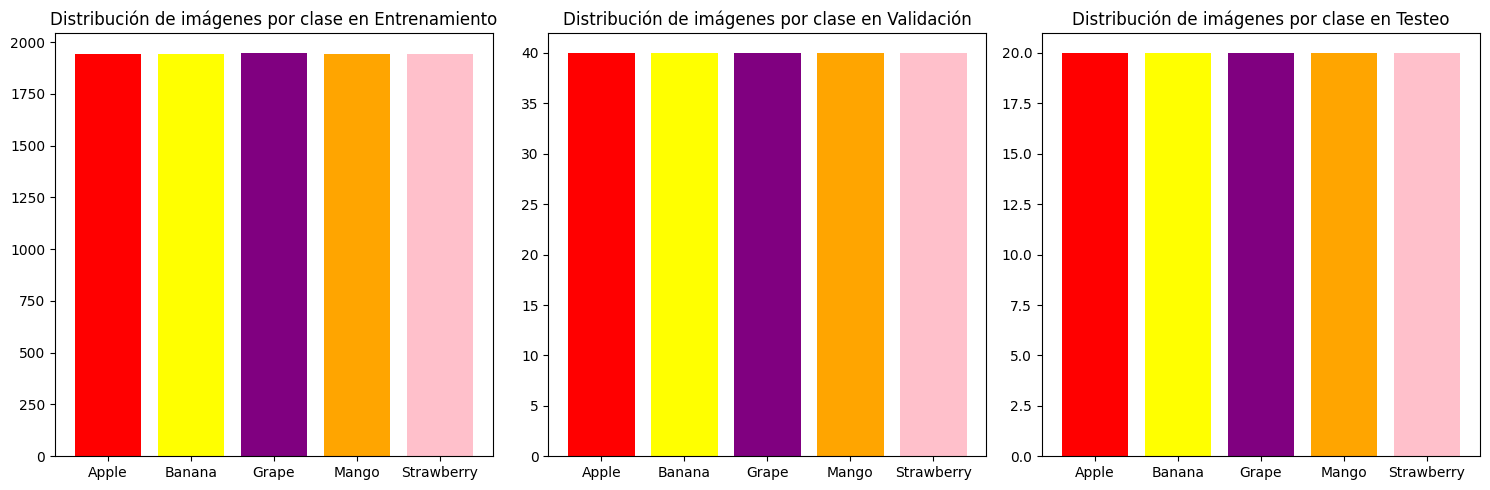

In [ ]:
# Colores para las barras del gráfico
color = ['red', 'yellow', 'purple', 'orange', 'pink']

# Crea la figura y ejes de los graficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Recorre el diccionario que contiene las rutas de los datasets y los ejes de los gráficos
for (dataset_name, dataset_path), ax in zip(dataset_paths.items(), axes):
    # Distribución de imágenes por clase
    conteos = [len(os.listdir(os.path.join(dataset_path, clase))) for clase in clases]

    # Ajusta las características del eje correspondiente
    ax.bar(x=clases, height=conteos, color=color)
    ax.set_xticks(ticks=clases)
    ax.set_title(f'Distribución de imágenes por clase en {dataset_name}')

# Evita la superposición de los gráficos
plt.tight_layout()
# Muestra los gráficos
plt.show()

Se aprecian buenas distribuciones de datos en los 3 datasets principales. Si existiese una mala distribución habría que aplicar técnicas de balanceo de clases como **Oversampling** o **SMOTE**, entre otras.

### Visualización de Muestras Aleatorias
Para conocer visualmente el dataset y posibles problemas:
- Imágenes corruptas
- Variaciones en el tamaño, perpectiva, iluminación...
- Ruido o imágenes mal etiquetadas

Visualizamos muestras aleatorias del dataset de entrenamiento.

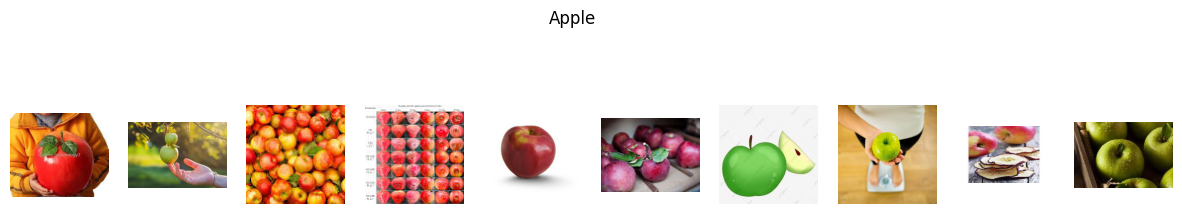

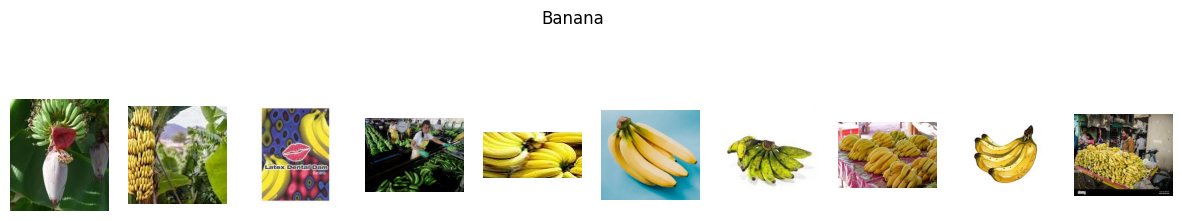

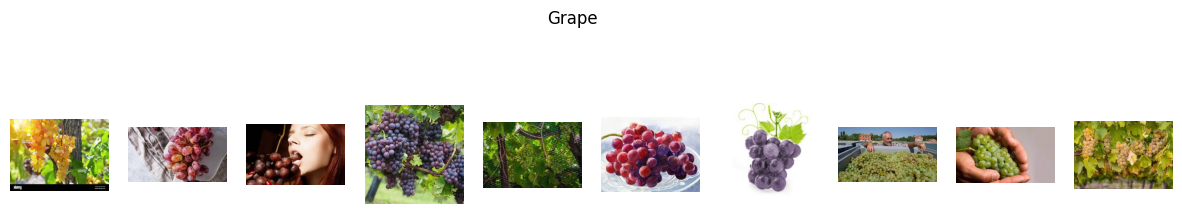

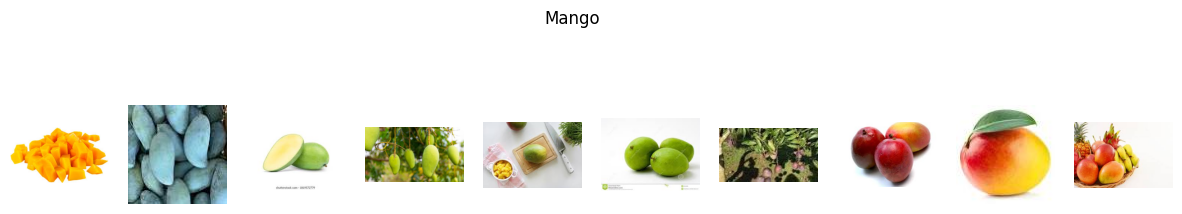

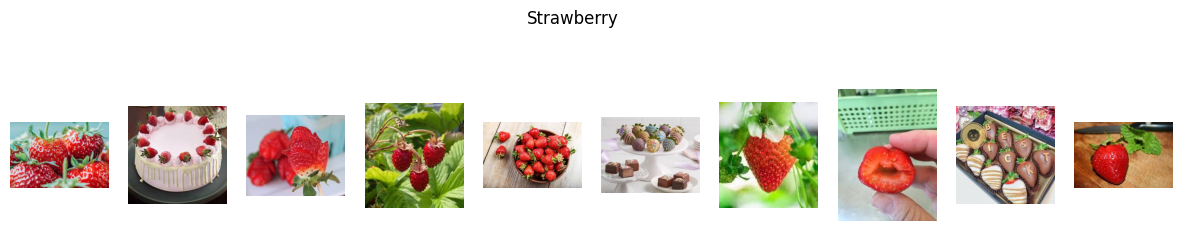

In [ ]:
# Itera sobre las clases encontradas y muestra 10 muestras aleatorias de cada una
for clase in clases:
    # Define la ruta a la clase dentro del dataset
    ruta_clase = os.path.join(dataset_paths['Entrenamiento'], clase)
    # Extrae una muestra aleatoria de 10 imágenes 
    muestra = random.sample(os.listdir(ruta_clase), 10)
    # Crea la figura y ejes de los gráficos
    fig, axes = plt.subplots(1, 10, figsize=(15,3))
    # Título superior del gráfico
    fig.suptitle(clase)
    # Recorre las imágenes de la muestra extraída y las asigna a su eje correspondiente
    for i, img_nombre in enumerate(muestra):
        # Abre la imagen 
        img = Image.open(os.path.join(ruta_clase, img_nombre))
        # Muestra la imagen
        axes[i].imshow(img)
        # Quita los ejes
        axes[i].axis('off')
    # Muestra el gráfico
    plt.show()

Se aprecia que la variedad de imágenes es bastente amplia, la misma clase contiene imágenes con diferentes perspectivas, entornos, iliminación, contexto, color... <br>
Esto nos da una idea sobre el modelo a utilizar, va a tener que ser un modelo muy complejo a nivel de estructura de capas debido a la complejidad de los patrones a detectar.

### Análisis de Dimensiones y Formato de las Imágenes
Para saber si todas tienen el mismo tamaño o hay que redimensionarlas. (Realizado sobre el dataset **Entrenamiento**)

In [186]:
# Objeto para contar el número de repeticiones de un valor
from collections import Counter

# Lista para guardar las dimensiones de las imágenes
dimensiones = []
# Itera sobre las clases encontradas y extrae sus dimensiones
for clase in clases:
    # Define la ruta a la clase dentro del dataset
    ruta_clase = os.path.join(dataset_paths['Entrenamiento'], clase)
    # Extrae las dimensiones de las imágenes
    for img_nombre in os.listdir(ruta_clase):
        # Abre la imagen
        img = Image.open(os.path.join(ruta_clase, img_nombre))
        # Añade la dimensión de la imagen a la lista de dimensiones
        dimensiones.append(img.size)

# Crea un objeto Counter a partir de la lista de dimensiones
conteo_dim = Counter(dimensiones)
# Crea un dataframe a partir del objeto que contiene el conteo de dimensiones
df_dimensiones = pd.DataFrame(conteo_dim.items(), columns=['Dimensiones','Cantidad'])
# Muestra el dataframe ordenado por cantidad
df_dimensiones.sort_values(by='Cantidad', ascending=False)


,Dimensiones,Cantidad
5,"(275, 183)",1503
1,"(225, 225)",1317
12,"(100, 100)",616
7,"(259, 194)",563
57,"(183, 275)",454
...,...,...
543,"(121, 182)",1
549,"(82, 144)",1
550,"(290, 124)",1
552,"(81, 98)",1


Se aprecia que no hay una escala predeterminada para las imágenes, los tamaños mas frecuentes en el dataset son:
- 275x183 px: 1503 imágenes encontradas.
- 225x225 px: 1317 imágenes encontradas.
- 100x100 px: 616 imágenes encontradas. 

Se aplicará un preprocesamiento a las mismas antes de proceder con el entrenamiento de la red.

### Estadísticas de Color
Para comprobar si las imágenes son en RGB, escala de grises... (Realizado sobre el dataset **Entrenamiento**)

In [ ]:
# Lista para guardar los formatos de las imágenes
formatos = []
# Itera sobre las clases encontradas y extrae sus formatos
for clase in clases:
    # Define la ruta a la clase dentro del dataset
    ruta_clase = os.path.join(dataset_paths['Entrenamiento'], clase)
    # Extrae los formatos
    for img_nombre in os.listdir(ruta_clase):
        # Abre la imagen
        img = Image.open(os.path.join(ruta_clase, img_nombre))
        # Añade el formato de la imagen a la lista de formatos
        formatos.append(img.mode)

# Crea un objeto Counter a partir de la lista de formatos
conteo_for = Counter(formatos)
# Crea un dataframe a partir del objeto que contiene el conteo de dimensiones
df_formatos = pd.DataFrame(conteo_for.items(), columns=['Formato','Cantidad'])
# Muestra el dataframe ordenado por cantidad
df_formatos.sort_values(by='Cantidad', ascending=False)

,Formato,Cantidad
0,RGB,9685
1,P,21
2,RGBA,1


Los formatos encontrados son los siguientes:
- RGB (3x8-bit pixels, a color).
- P (8-bit pixels, mapeado a otro modo mediante una paleta de color).
- RGBA (4x8-bit pixels, a color con un filtro de transparencia).

Se aplicara un preprocesamiento a las imágenes para tener todas en el mismo formato. <br>
El formato a aplicar será RGB, ya que el color es una característica fundamental en la clasificación de frutas.

### Verificar imágenes corruptas
En datasets muy grandes, es común encontrar imágenes corruptas. Existen diferentes tipos de corrupción que pueden afectar a una imagen:
|       📂 Tipo de corrupción       | 📌 Descripción                                                                                                   |
| :-------------------------------: | :--------------------------------------------------------------------------------------------------------------- |
|       **Archivo incompleto**      | El archivo se descargó parcialmente o se truncó, y no contiene todos los datos necesarios para ser decodificado. |
| **Formato inválido o incorrecto** | El archivo tiene una extensión `.jpg` pero en realidad no es un JPEG válido (o es otro formato renombrado).      |
|     **Datos mal codificados**     | El contenido binario no sigue las especificaciones del formato de imagen.                                        |
|    **Metadatos inconsistentes**   | Información en el header de la imagen (dimensiones, canales, profundidad) no concuerda con los datos reales.     |
|        **Imagen ilegible**        | Librerías como PIL, OpenCV, o matplotlib lanzan errores al intentar abrirla.                                     |
|   **Imágenes vacías (0 bytes)**   | Archivos sin contenido.                                                                                          |


In [189]:
# Lista para guardar las rutas de las imágenes corruptas
errores = []

# Itera sobre las clases encontradas y detecta las imagenes corruptas
for clase in clases:
    # Define la ruta a la clase dentro del dataset
    ruta_clase = os.path.join(dataset_paths['Entrenamiento'], clase)
    # Extrae las rutas de las imagenes corruptas
    for img_nombre in os.listdir(ruta_clase):
        # Intenta abrir la imagen
        try:
            img = Image.open(os.path.join(ruta_clase, img_nombre))
            img.verify()  # Verifica sin cargar la imagen completa en memoria
        # En caso de error, se guarda la ruta de la imagen
        except:
            errores.append(os.path.join(clase, img_nombre))

# Muestra el numero de imagenes corruptas
print(f"Imágenes corruptas encontradas: {len(errores)}")
print(errores)


Imágenes corruptas encontradas: 0
[]


Se aprecia que el dataset **NO** contiene imágenes corruptas. En el caso de que las hubiese habría que eliminarlas, ya que estas afectarían al modelo.

### Conclusiones del EDA:
En función del EDA realizado podemos sacar las siguientes conclusiones sobre nuestro conjunto de datos:
- Distribución de Clases:
    - Todos los datasets dentro del dataset principal cuentan con una buena distribución de clases.
    - No es necesario aplicar ningún método de balanceo de clases.
    - El número de imágenes por dataset son: 
        - Entrenamiento: 9707 imágenes.
        - Validación: 200 imágenes.
        - Testeo: 100 imágenes.
- Visualización de muestras aleatorias:
    - La variedad de factores a tener en cuenta para la clasificación es demasiado grande (perspectivas, entornos, iliminación, contexto, color...).
    - Para obtener una buena clasificación se deberá utilizar un modelo con una estructura de capas compleja.
- Análisis de Dimensiones y Formato de las Imágenes:
    - Las imágenes no cuentan con un tamaño predeterminado.
    - Se aplicará un preprocesamiento previo al entreno del modelo para definir un tamaño general.
- Estadísticas de Color:
    - Una gran parte de las imágenes estan en formato RGB (A color), aunque una pequeña parte se encuentra en un formato diferente.
    - Se aplicará un preprocesamiento previo al entreno del modelo para definir un formato general.
- Verificar imágenes corruptas:
    - NO se han encontrado imágenes corruptas.

## Carga, preprocesamiento y división de datos
En este apartado se realiza la carga, preprocesamiento y división de datos, todo en uno. <br> 
Esto es gracias a una función de tensorflow denominada ``image_dataset_from_directory``, la cuál nos permite crear almacenes de imágenes y establecer un flujo de datos entre el propio almacén y el modelo a entrenar. <br>
Crearemos tres almacenes de imágenes diferentes:
- Una para entrenar el modelo.
- Otro para validar el modelo.
- Un último para testear el modelo ya entrenado.

Todos ellos contarán con el mismo proprocesamiento y división de datos. <br>
El tamaño elegido para las imágenes es de 224x224x3 px, esto es debido a que las redes convolucionales preentrenadas a utilizar fueron entranadas con estos tamaños.

In [ ]:
# Librerias para trabajar con datasets
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Variables de preprocesamiento
img_size = (224, 224)
img_mode = 'rgb'
# Variables de división de datos
batch_size = 32

# Creación de los almacenes de datos que contienen las imágenes
# Dataset de entrenamiento
print(15 * '-' + "DATASET ENTRENAMIENTO" + 15 * '-')
train_ds = image_dataset_from_directory(
    directory="Fruits Classification/train", # Directorio con las imágenes de entrenamiento
    labels='inferred', # Indica que las etiquetas de las clases se obtienen de las subcarpetas en el dataset
    label_mode='categorical', # Indica que las etiquetas se encodean como un vector categórico (Multiclase)
    color_mode = img_mode, # Preprocesa las imágenes y las pasa a formato RGB
    image_size=img_size, # Preprocesa las imágenes para que tengan un tamaño de 224x224 px
    validation_split=0.2, # Fracciona los datos para crear un conjunto de validación
    subset='training', # Indica que el dataset se usará para entrenamiento
    batch_size = batch_size, # Indica el tamaño de los lotes en los que actualizar los pesos
    seed=42 # Asegura la aleatoridad de los datos para reproducibilidad
)

# Dataset de validación
print(15 * '-' + "DATASET VALIDACIÓN" + 15 * '-')
val_ds = image_dataset_from_directory(
    directory="Fruits Classification/train", 
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset='validation',
    color_mode = img_mode,
    image_size=img_size,
    batch_size = batch_size,
    seed=42
)

# Dataset de testeo
print(15 * '-' + "DATASET TEST" + 15 * '-')
test_ds = image_dataset_from_directory(
    directory="Fruits Classification/test",
    labels='inferred',
    label_mode='categorical',
    color_mode = img_mode,
    image_size=img_size,
    batch_size = batch_size,
    seed=42
)

# Define el algoritmo de optimización AUTOTUNE, esto optimiza el flujo de datos entre los datasets y el model.
# Más información sobre AUTOTUNE: https://www.tensorflow.org/guide/data_performance?hl=es-419
AUTOTUNE = tf.data.AUTOTUNE
# Aplica el algoritmo a los almacenes de imágenes definidos
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

---------------DATASET ENTRENAMIENTO---------------
Found 9707 files belonging to 5 classes.
Using 7766 files for training.
---------------DATASET VALIDACIÓN---------------
Found 9707 files belonging to 5 classes.
Using 1941 files for validation.
---------------DATASET TEST---------------
Found 100 files belonging to 5 classes.


## Entrenamiento de modelos
Como ya se ha comentado previamente, las imágenes para la clasificación requieren de una estructura de capas compleja debido a la gran variedad de factores presentes en las mismas. <br>
Se van a realizar varios entrenamientos con diversos modelos:
- Una red sencilla con estructura VGG-like.
- Redes preentrenadas enfocadas al clasificamiento de imágenes:
    - Resnet50
    - MobileNetV2
    - EfficientNetB0

En estas últimas, como se tratan de redes ya entrenadas, realizaremos una técnica denominada como ``fine-tuning``. <br>
Esta consiste en cambiar los parámetros de un modelo previamente entrenado para responder a una tarea o un conjunto de datos específico. <br>
Finalmente se procederá a una comparación en las métricas de evaluación de los modelos para decidir cual es la mejor.

### Importación de librerías necesarias para el entrenamiento de los modelos

In [3]:
# Librerias para trabajar con redes neuronales
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from time import time

### Modelo VGG-Like
| 📌 Modelo          | 📖 Descripción| 📈 Pros | ⚠️ Contras|
| :----------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------- | :--------------------------------------- |
| **VGG-Like**       | Arquitectura clásica basada en pilas secuenciales de bloques `Conv -> ReLU -> MaxPool`, con capas totalmente conectadas al final. Inspirada en **VGG16/VGG19**.| Simple de implementar y entender.                        | Pesado en parámetros y memoria.          |

#### Carga y creación del modelo

In [ ]:
# Creación de un modelo VGG-Like
model = Sequential([
    # Extracción de características
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(),

    # Aplanamiento de características
    Flatten(),
    # Procesamiento de características
    Dense(512, activation='relu'),
    # Salida softmax de 5 clases
    Dense(5, activation='softmax')
])

#### Compilación y entrenamiento del modelo

In [5]:
# Compilar y entrenar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Establece un EarlyStoping para prevenir el sobreajuste y detener el entrenamiento en las épocas adecuadas
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

inicio = time() # Inicio de entrenamiento
# Entrenamiento
history = model.fit(train_ds, validation_data=val_ds, epochs=50, batch_size=64, validation_split=0.1, verbose=2, callbacks=[early_stop])
final = time() # Final de entrenamiento

# Mostrar duración de entrenamiento
print(f"Duración del entrenamiento: {final - inicio:.2f} s")

Epoch 1/50
243/243 - 70s - loss: 76.6187 - accuracy: 0.2087 - val_loss: 1.6104 - val_accuracy: 0.2500 - 70s/epoch - 286ms/step
Epoch 2/50
243/243 - 53s - loss: 1.6016 - accuracy: 0.2147 - val_loss: 1.6406 - val_accuracy: 0.2000 - 53s/epoch - 216ms/step
Epoch 3/50
243/243 - 52s - loss: 1.5887 - accuracy: 0.2283 - val_loss: 1.6589 - val_accuracy: 0.2000 - 52s/epoch - 213ms/step
Epoch 4/50
243/243 - 52s - loss: 1.5889 - accuracy: 0.2430 - val_loss: 1.6482 - val_accuracy: 0.2250 - 52s/epoch - 213ms/step
Epoch 5/50
243/243 - 52s - loss: 1.5369 - accuracy: 0.2662 - val_loss: 2.3125 - val_accuracy: 0.2250 - 52s/epoch - 213ms/step
Epoch 6/50
243/243 - 52s - loss: 1.4680 - accuracy: 0.3155 - val_loss: 2.0670 - val_accuracy: 0.2000 - 52s/epoch - 214ms/step
Duración del entrenamiento: 329.57 s


#### Métricas de evaluación

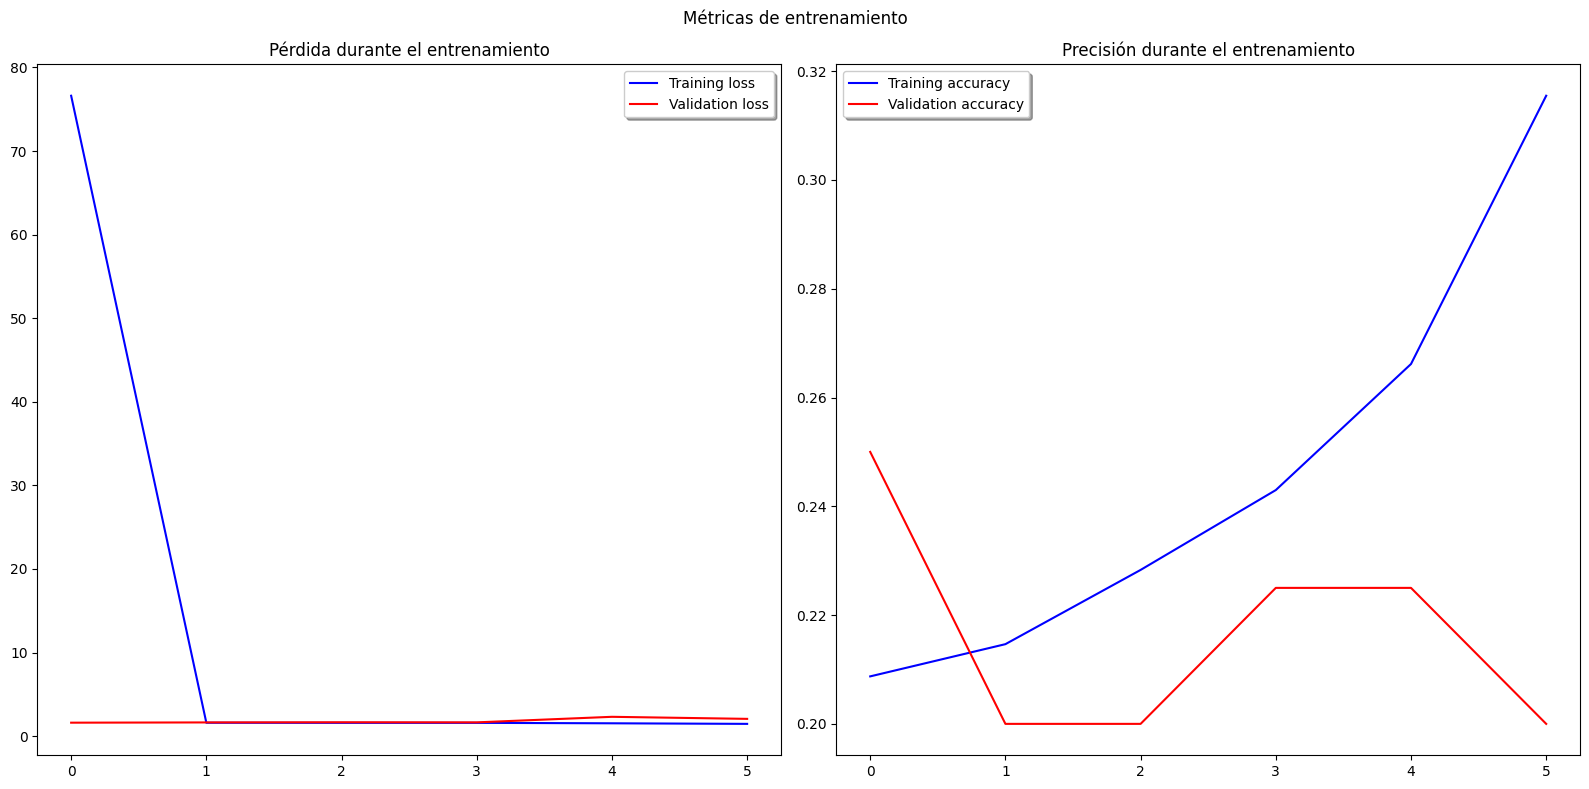

Test Accuracy: 21.00%
Test Loss: 1.6042
Mejor Validation Loss: 1.6104
1/1 [==============================] - 0s 58ms/step


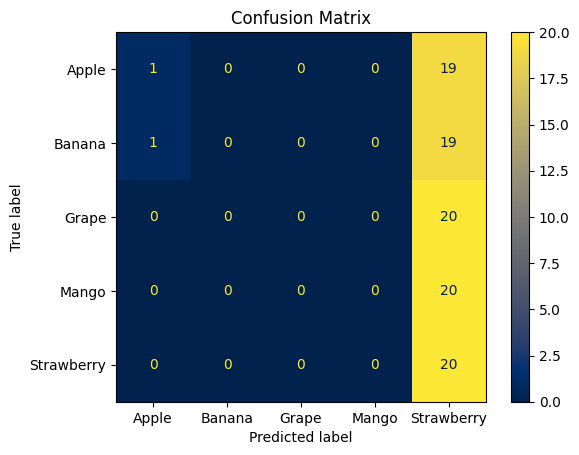

              precision    recall  f1-score   support

       Apple       0.50      0.05      0.09        20
      Banana       0.00      0.00      0.00        20
       Grape       0.00      0.00      0.00        20
       Mango       0.00      0.00      0.00        20
  Strawberry       0.20      1.00      0.34        20

    accuracy                           0.21       100
   macro avg       0.14      0.21      0.09       100
weighted avg       0.14      0.21      0.09       100



c:\USERS\SFESP\ONEDRIVE\ESCRITORIO\PROGRAMACIÓN\PROGRAMACIÓN MODELOS DE IA\PROYECTO FINAL\.VENV_GPU\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\USERS\SFESP\ONEDRIVE\ESCRITORIO\PROGRAMACIÓN\PROGRAMACIÓN MODELOS DE IA\PROYECTO FINAL\.VENV_GPU\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\USERS\SFESP\ONEDRIVE\ESCRITORIO\PROGRAMACIÓN\PROGRAMACIÓN MODELOS DE IA\PROYECTO FINAL\.VENV_GPU\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-de

In [6]:
# === Gráficos del entrenamiento ===
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pérdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Pérdida durante el entrenamiento')

# Precisión
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisión durante el entrenamiento')

# Mostrar gráficos
plt.suptitle("Métricas de entrenamiento")
plt.tight_layout()
plt.show()

# Obtener la precisión y pérdida del conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Obtener la pérdida mas baja en la validación
val_loss = min(history.history['val_loss'])
print(f"Mejor Validation Loss: {val_loss:.4f}")


# Listas donde almacenar las predicciones del modelo
# Valores reales
y_true = []
# Valores predichos
y_pred = []

# Realiza las predicciones con el conjunto de validación y almacena sus resultados
for image, labels in test_ds:
    # Realiza la predicción
    preds = model.predict(image)
    # Añade la etiqueta real de la imagen actual
    y_true.extend(labels.numpy())
    # Añade la etiqueta predicha por el modelo
    y_pred.extend(preds)

# Guardamos el indice con el mayor valor de cada array
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_true, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Apple","Banana","Grape","Mango","Strawberry"])
disp.plot(cmap=plt.cm.cividis)
plt.title("Confusion Matrix")
plt.show()

# Reporte de clasificación para analizar métricas por cada clase por separado
print(classification_report(y_true, y_pred, target_names=["Apple","Banana","Grape","Mango","Strawberry"]))


### Interpretación de resultados
Como era de esperar el modelo tiene un rendimiento nefasto, una estructura de capas tan simple no es capaz de conseguir adaptarse a unas imágenes con tantos patrones.
- Se obtiene una precisión y pérdida mediocres en el entrenamiento pero cae en picado en la validación.
- La red es totalmente incapaz de diferenciar datos nuevos de entrada, como se muestra en la matriz de confusión.

### Modelo ResNet50
| 📌 Modelo          | 📖 Descripción                                                                                                                                                              | 📈 Pros                                                  | ⚠️ Contras                               |
| :----------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------- | :--------------------------------------- |
| **ResNet50**       | CNN profunda de **50 capas** con **bloques residuales (skip connections)** que evitan el problema de desvanecimiento del gradiente y permiten entrenar redes muy profundas. | Muy buena precisión y estabilidad en redes profundas.    | Más pesada que MobileNet o EfficientNet. |

#### Carga y creación del modelo

In [19]:
from tensorflow.keras.applications import ResNet50

# Cargar ResNet50 sin top
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False # Evita que se modifiquen los pesos del modelo preentrenado durante el entrenamiento

# Agregar cabeza personalizada
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(5, activation='softmax')(x)
model_resnet = Model(inputs, outputs)

#### Compilación y entrenamiento del modelo

In [20]:
# Compilar y entrenar
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Establece un EarlyStoping para prevenir el sobreajuste y detener el entrenamiento en las épocas adecuadas
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

inicio = time() # Inicio de entrenamiento
# Entrenamiento
history = model_resnet.fit(train_ds, validation_data=val_ds, epochs=50, batch_size=64, validation_split=0.1, callbacks=[early_stop])
final = time() # Final de entrenamiento

# Mostrar duración de entrenamiento
print(f"Duración del entrenamiento: {final - inicio:.2f} s")

Epoch 1/50
243/243 [==============================] - 23s 89ms/step - loss: 0.6067 - accuracy: 0.7810 - val_loss: 0.4386 - val_accuracy: 0.8475
Epoch 2/50
243/243 [==============================] - 21s 85ms/step - loss: 0.3485 - accuracy: 0.8781 - val_loss: 0.4250 - val_accuracy: 0.8496
Epoch 3/50
243/243 [==============================] - 21s 85ms/step - loss: 0.2488 - accuracy: 0.9164 - val_loss: 0.3921 - val_accuracy: 0.8624
Epoch 4/50
243/243 [==============================] - 21s 85ms/step - loss: 0.1830 - accuracy: 0.9375 - val_loss: 0.3951 - val_accuracy: 0.8686
Epoch 5/50
243/243 [==============================] - 21s 86ms/step - loss: 0.1191 - accuracy: 0.9643 - val_loss: 0.4067 - val_accuracy: 0.8645
Epoch 6/50
243/243 [==============================] - 21s 86ms/step - loss: 0.0876 - accuracy: 0.9741 - val_loss: 0.4356 - val_accuracy: 0.8691
Epoch 7/50
243/243 [==============================] - 21s 86ms/step - loss: 0.0583 - accuracy: 0.9849 - val_loss: 0.4617 - val_accuracy:

#### Métricas de evaluación

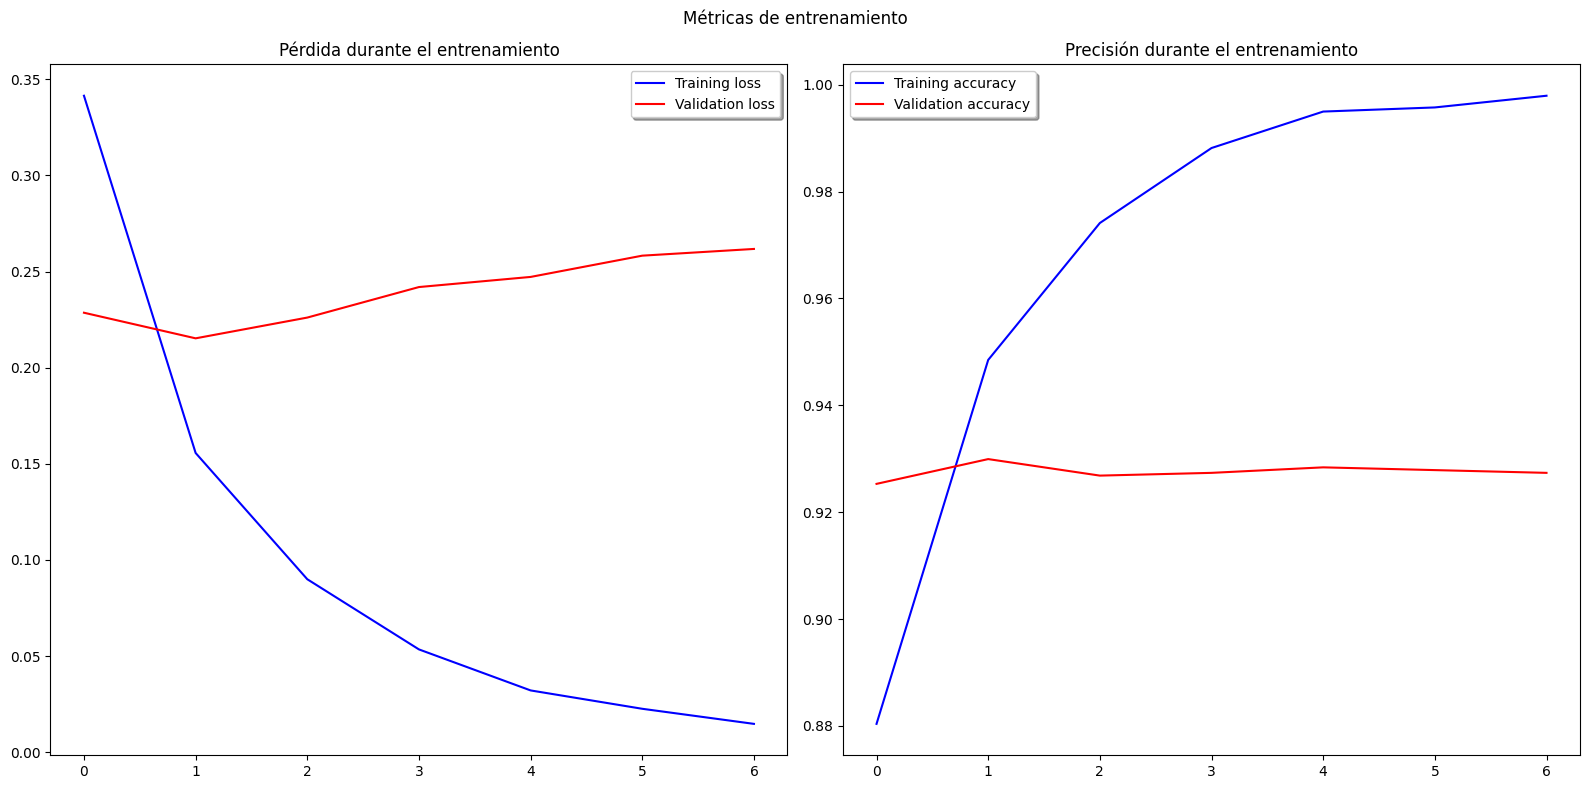

Test Accuracy: 89.00%
Test Loss: 0.3510
Mejor Validation Loss: 0.2153
1/1 [==============================] - 0s 26ms/step


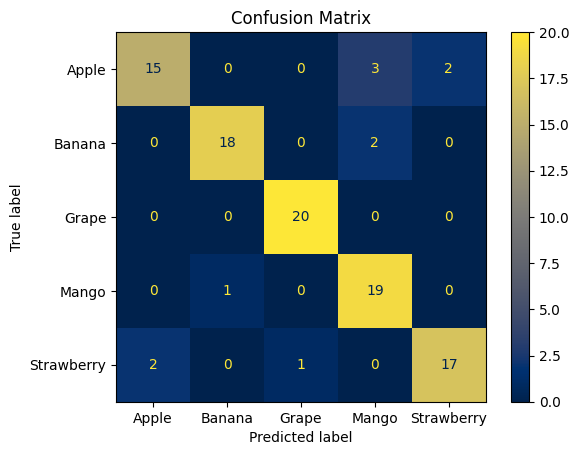

              precision    recall  f1-score   support

       Apple       0.88      0.75      0.81        20
      Banana       0.95      0.90      0.92        20
       Grape       0.95      1.00      0.98        20
       Mango       0.79      0.95      0.86        20
  Strawberry       0.89      0.85      0.87        20

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [35]:
# === Gráficos del entrenamiento ===
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pérdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Pérdida durante el entrenamiento')

# Precisión
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisión durante el entrenamiento')

# Mostrar gráficos
plt.suptitle("Métricas de entrenamiento")
plt.tight_layout()
plt.show()

# Obtener la precisión y pérdida del conjunto de prueba
test_loss, test_accuracy = model_resnet.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Obtener la pérdida mas baja en la validación
val_loss = min(history.history['val_loss'])
print(f"Mejor Validation Loss: {val_loss:.4f}")

# Listas donde almacenar las predicciones del modelo
# Valores reales
y_true = []
# Valores predichos
y_pred = []

# Realiza las predicciones con el conjunto de validación y almacena sus resultados
for image, labels in test_ds:
    # Realiza la predicción
    preds = model_resnet.predict(image)
    # Añade la etiqueta real de la imagen actual
    y_true.extend(labels.numpy())
    # Añade la etiqueta predicha por el modelo
    y_pred.extend(preds)

# Guardamos el indice con el mayor valor de cada array
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_true, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Apple","Banana","Grape","Mango","Strawberry"])
disp.plot(cmap=plt.cm.cividis)
plt.title("Confusion Matrix")
plt.show()

# Reporte de clasificación para analizar métricas por cada clase por separado
print(classification_report(y_true, y_pred, target_names=["Apple","Banana","Grape","Mango","Strawberry"]))


### Interpretación de métricas
Este modelo ya es otra cosa comparado con el anterior:
- Aunque se puede apreciar en las gráficas de pérdida y precisión que la validación y entrenamiento distan un poco entre sí, lo cual sería un signo claro de sobreajuste, es normal ya que estamos empleando un datastet muy pequeño para realizar fine tunning sobre una red la cual ha sido entrenada con millones de imágenes.
- Según la matriz de confusión, la red es capaz de clasificar con bastante precisión nuevos datos de entrada.

Por el momento la CNN con mejores resultados.


### Modelo MobileNetV2
| 📌 Modelo          | 📖 Descripción                                                                                                                                                              | 📈 Pros                                                  | ⚠️ Contras                               |
| :----------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------- | :--------------------------------------- |
| **MobileNetV2**    | Modelo optimizado para dispositivos móviles y sistemas embebidos, usa **depthwise separable convolutions** y **inverted residuals** para reducir cómputo y tamaño.          | Ligero y rápido, buen rendimiento en entornos limitados. | Precisión menor a ResNet/EfficientNet.   |

#### Carga y creación del modelo

In [37]:
from tensorflow.keras.applications import MobileNetV2

# Cargar MobileNetV2 sin top
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False # Detiene la base de la red para no entrenarla

# Agrega una nueva capa de entreda y salida que se ajuste a nuestro dataset
inputs = Input(shape=(224,224,3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
# Salida softmax de 5 clases
outputs = Dense(5, activation='softmax')(x)

# Definición final del modelo
model_mobilenet = Model(inputs, outputs)

#### Compilación y entrenamiento del modelo

In [40]:
# Compilar y entrenar
model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Establece un EarlyStoping para prevenir el sobreajuste y detener el entrenamiento en las épocas adecuadas
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

inicio = time() # Inicio de entrenamiento
# Entrenamiento
history = model_mobilenet.fit(train_ds, validation_data=val_ds, epochs=50, batch_size=64, validation_split=0.1, callbacks=[early_stop])
final = time() # Final de entrenamiento

# Mostrar duración de entrenamiento
print(f"Duración del entrenamiento: {final - inicio:.2f} s")

Epoch 1/50
243/243 [==============================] - 14s 51ms/step - loss: 0.9534 - accuracy: 0.6273 - val_loss: 1.0866 - val_accuracy: 0.5873
Epoch 2/50
243/243 [==============================] - 11s 47ms/step - loss: 0.9104 - accuracy: 0.6449 - val_loss: 1.1766 - val_accuracy: 0.5507
Epoch 3/50
243/243 [==============================] - 12s 49ms/step - loss: 0.8624 - accuracy: 0.6693 - val_loss: 1.1158 - val_accuracy: 0.5791
Epoch 4/50
243/243 [==============================] - 12s 48ms/step - loss: 0.8375 - accuracy: 0.6792 - val_loss: 1.1155 - val_accuracy: 0.5827
Epoch 5/50
243/243 [==============================] - 12s 49ms/step - loss: 0.7866 - accuracy: 0.7011 - val_loss: 1.1036 - val_accuracy: 0.5930
Epoch 6/50
243/243 [==============================] - 12s 48ms/step - loss: 0.7503 - accuracy: 0.7132 - val_loss: 1.1738 - val_accuracy: 0.5662
Duración del entrenamiento: 73.05 s


#### Métricas de evaluación

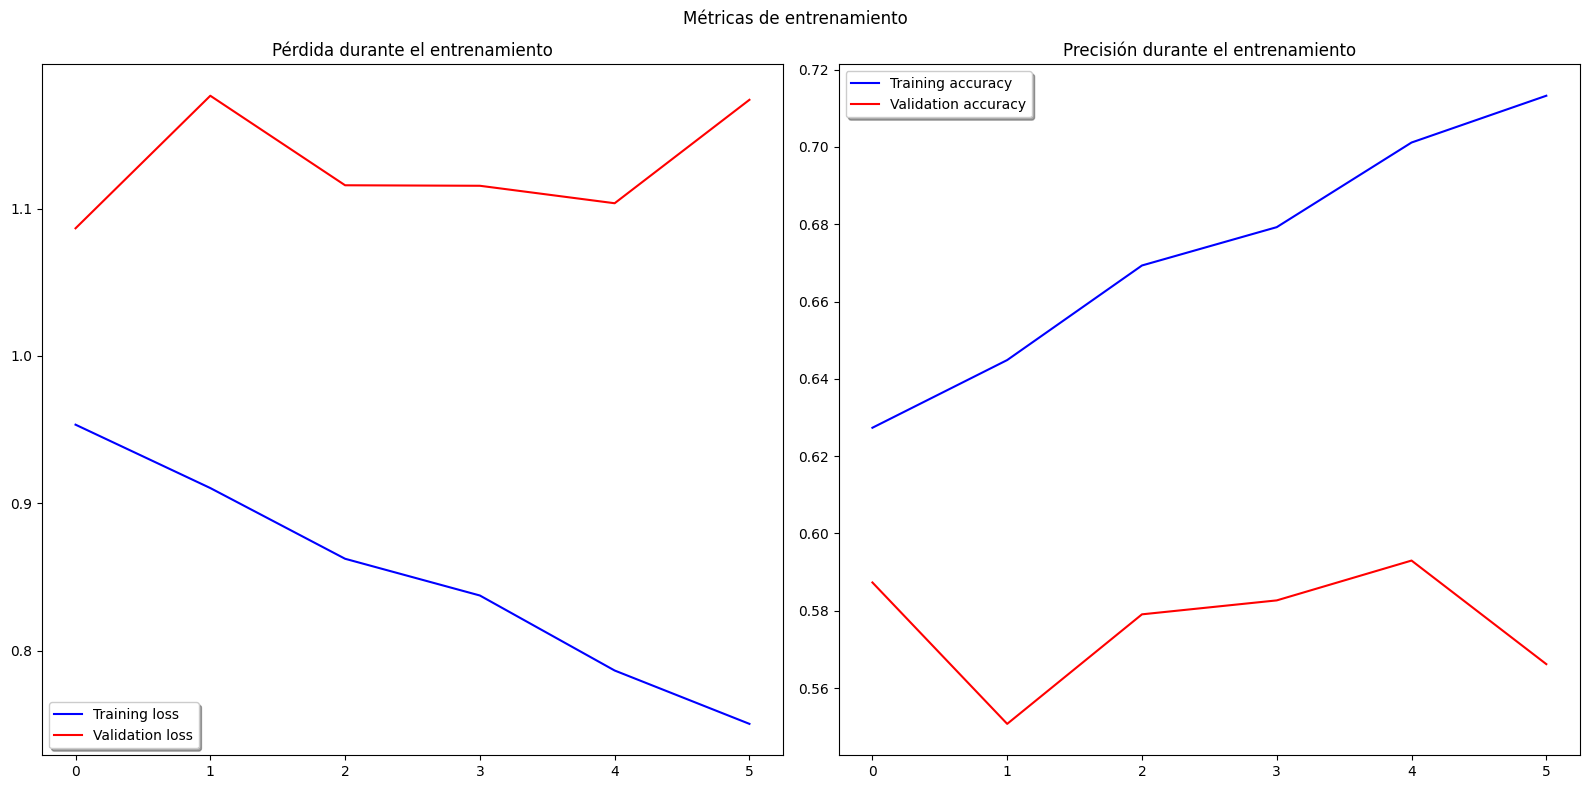

Test Accuracy: 61.00%
Test Loss: 1.0512
Mejor Validation Loss: 1.0866
1/1 [==============================] - 0s 481ms/step


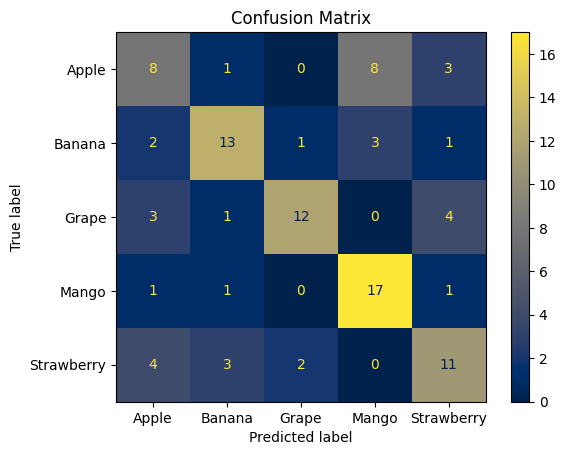

              precision    recall  f1-score   support

       Apple       0.44      0.40      0.42        20
      Banana       0.68      0.65      0.67        20
       Grape       0.80      0.60      0.69        20
       Mango       0.61      0.85      0.71        20
  Strawberry       0.55      0.55      0.55        20

    accuracy                           0.61       100
   macro avg       0.62      0.61      0.61       100
weighted avg       0.62      0.61      0.61       100



In [41]:
# === Gráficos del entrenamiento ===
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pérdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Pérdida durante el entrenamiento')

# Precisión
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisión durante el entrenamiento')

# Mostrar gráficos
plt.suptitle("Métricas de entrenamiento")
plt.tight_layout()
plt.show()

# Obtener la precisión y pérdida del conjunto de prueba
test_loss, test_accuracy = model_mobilenet.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Obtener la pérdida mas baja en la validación
val_loss = min(history.history['val_loss'])
print(f"Mejor Validation Loss: {val_loss:.4f}")

# Listas donde almacenar las predicciones del modelo
# Valores reales
y_true = []
# Valores predichos
y_pred = []

# Realiza las predicciones con el conjunto de validación y almacena sus resultados
for image, labels in test_ds:
    # Realiza la predicción
    preds = model_mobilenet.predict(image)
    # Añade la etiqueta real de la imagen actual
    y_true.extend(labels.numpy())
    # Añade la etiqueta predicha por el modelo
    y_pred.extend(preds)

# Guardamos el indice con el mayor valor de cada array
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_true, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Apple","Banana","Grape","Mango","Strawberry"])
disp.plot(cmap=plt.cm.cividis)
plt.title("Confusion Matrix")
plt.show()

# Reporte de clasificación para analizar métricas por cada clase por separado
print(classification_report(y_true, y_pred, target_names=["Apple","Banana","Grape","Mango","Strawberry"]))


### Interpretación de métricas
Obtenemos un rendimiento inferior a ResNet50:
- Las gráficas de pérdida y precisión en entrenamiento y validación están demasiado dispersas entre si, posible sobreajuste.
- Según la matriz de confusión, la red es capaz de clasificar con una precisión media los nuevos datos de entrada. Aunque con menos precisión que ResNet50.
- Convendría aplicar ``data augmentation`` para reducir el sobreajuste.
ResNet50 sigue manteniendo el primer puesto.

### Modelo EfficientNetB0
| 📌 Modelo          | 📖 Descripción                                                                                                                                                              | 📈 Pros                                                  | ⚠️ Contras                               |
| :----------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------- | :--------------------------------------- |
| **EfficientNetB0** | Modelo moderno que optimiza simultáneamente **profundidad, ancho y resolución** de la red mediante **compound scaling**. Gran relación precisión/eficiencia.                | Alta precisión con menos parámetros y FLOPs.             | Algo más complejo de ajustar/customizar. |

#### Carga y creación del modelo

In [42]:
from tensorflow.keras.applications import EfficientNetB0

# Cargar EfficientNetB0 sin la parte superior
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar la base para no entrenarla
base_model.trainable = False

# Añadir capa de entrada y salida ajustada a nuestro dataset al modelo
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(5, activation='softmax')(x)

# Definición final del modelo
model_efficientNet = Model(inputs, outputs)

#### Compilación y entrenamiento del modelo

In [43]:
# Compilar y entrenar
model_efficientNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Establece un EarlyStoping para prevenir el sobreajuste y detener el entrenamiento en las épocas adecuadas
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

inicio = time() # Inicio de entrenamiento
# Entrenamiento
history = model_efficientNet.fit(train_ds, validation_data=val_ds, epochs=50, batch_size=64, validation_split=0.1, callbacks=[early_stop])
final = time() # Final de entrenamiento

# Mostrar duración de entrenamiento
print(f"Duración del entrenamiento: {final - inicio:.2f} s")

Epoch 1/50
243/243 [==============================] - 21s 72ms/step - loss: 0.3454 - accuracy: 0.8773 - val_loss: 0.2347 - val_accuracy: 0.9176
Epoch 2/50
243/243 [==============================] - 16s 67ms/step - loss: 0.1605 - accuracy: 0.9485 - val_loss: 0.2159 - val_accuracy: 0.9289
Epoch 3/50
243/243 [==============================] - 16s 66ms/step - loss: 0.0948 - accuracy: 0.9731 - val_loss: 0.2161 - val_accuracy: 0.9304
Epoch 4/50
243/243 [==============================] - 16s 67ms/step - loss: 0.0614 - accuracy: 0.9840 - val_loss: 0.2417 - val_accuracy: 0.9279
Epoch 5/50
243/243 [==============================] - 16s 66ms/step - loss: 0.0365 - accuracy: 0.9927 - val_loss: 0.2390 - val_accuracy: 0.9325
Epoch 6/50
243/243 [==============================] - 16s 65ms/step - loss: 0.0207 - accuracy: 0.9973 - val_loss: 0.2440 - val_accuracy: 0.9366
Epoch 7/50
243/243 [==============================] - 16s 67ms/step - loss: 0.0136 - accuracy: 0.9985 - val_loss: 0.2465 - val_accuracy:

#### Métricas de evaluación

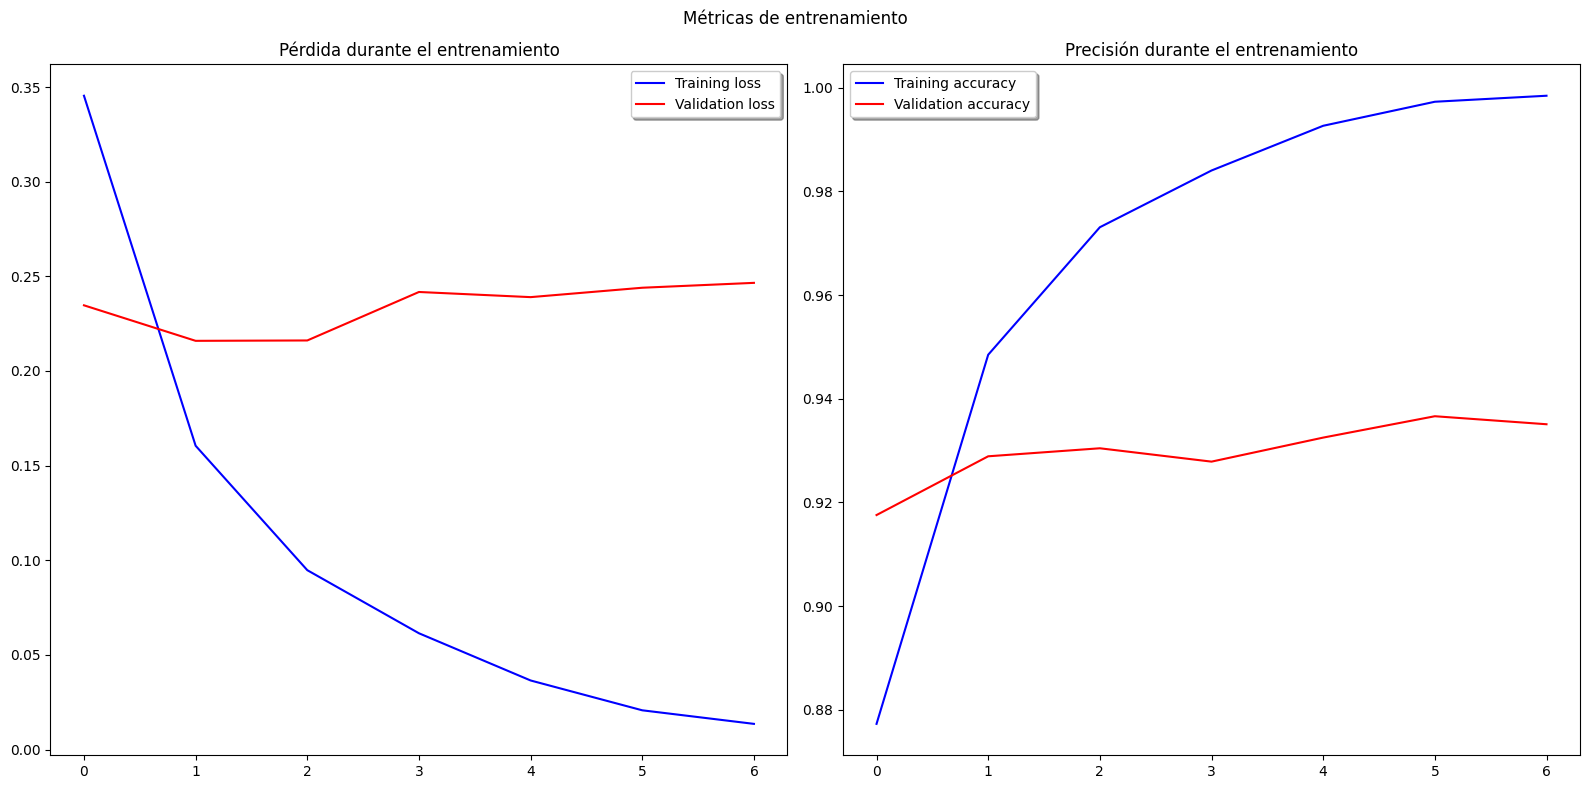

Test Accuracy: 93.00%
Test Loss: 0.2138
Mejor Validation Loss: 0.2159
1/1 [==============================] - 1s 942ms/step


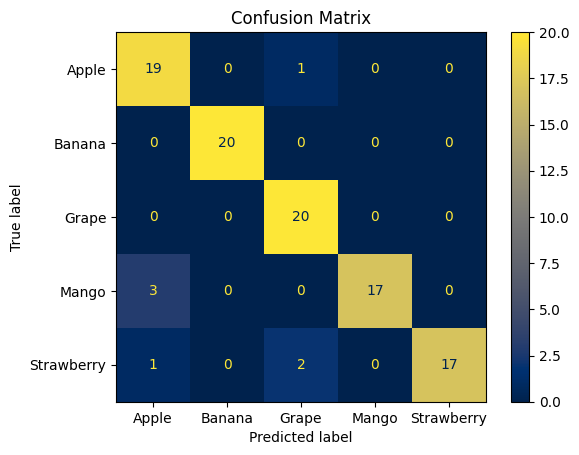

              precision    recall  f1-score   support

       Apple       0.83      0.95      0.88        20
      Banana       1.00      1.00      1.00        20
       Grape       0.87      1.00      0.93        20
       Mango       1.00      0.85      0.92        20
  Strawberry       1.00      0.85      0.92        20

    accuracy                           0.93       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.94      0.93      0.93       100



In [44]:
# === Gráficos del entrenamiento ===
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pérdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Pérdida durante el entrenamiento')

# Precisión
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisión durante el entrenamiento')

# Mostrar gráficos
plt.suptitle("Métricas de entrenamiento")
plt.tight_layout()
plt.show()

# Obtener la precisión y pérdida del conjunto de prueba
test_loss, test_accuracy = model_efficientNet.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Obtener la pérdida mas baja en la validación
val_loss = min(history.history['val_loss'])
print(f"Mejor Validation Loss: {val_loss:.4f}")

# Listas donde almacenar las predicciones del modelo
# Valores reales
y_true = []
# Valores predichos
y_pred = []

# Realiza las predicciones con el conjunto de validación y almacena sus resultados
for image, labels in test_ds:
    # Realiza la predicción
    preds = model_efficientNet.predict(image)
    # Añade la etiqueta real de la imagen actual
    y_true.extend(labels.numpy())
    # Añade la etiqueta predicha por el modelo
    y_pred.extend(preds)

# Guardamos el indice con el mayor valor de cada array
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_true, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Apple","Banana","Grape","Mango","Strawberry"])
disp.plot(cmap=plt.cm.cividis)
plt.title("Confusion Matrix")
plt.show()

# Reporte de clasificación para analizar métricas por cada clase por separado
print(classification_report(y_true, y_pred, target_names=["Apple","Banana","Grape","Mango","Strawberry"]))


### Interpretación de métricas
Obtenemos un rendimiento superior a ResNet50:
- Aunque se puede apreciar en las gráficas de pérdida y precisión que la validación y entrenamiento distan un poco entre sí, lo cual sería un signo claro de sobreajuste, es normal ya que estamos empleando un datastet muy pequeño para realizar fine tunning sobre una red la cual ha sido entrenada con millones de imágenes.
- Según la matriz de confusión, la red es capaz de clasificar con mucha precisión nuevos datos de entrada. Con una mayor precisión que ResNet50.

El modelo ganador 🥳🥳🥳

## Tabla comparativa de modelos
| Modelo      | Test Accuracy (%) | Precision Macro (%) | Recall Macro (%) | F1-Score Macro (%) | Validation Loss | Test Loss | Tiempo de Entrenamiento (segundos) |
| :---------- | :---------------: | :------------------ | :--------------- | :----------------- | :-------------- | :-------- | :---------------------------- |
|    VGG-like |        21.0       | 14                | 21             | 9               | 1.6104            | 1.6042      | 329.57                            |
|    ResNet50 |        89       | 89                | 89             | 89               | 0.2153            | 0.3510      | 169.82                            |
| MobileNetV2 |         61         |62                   | 61                | 61                  | 1.0866               | 1.0512         | 73.05                             |
|EfficientNetB0|         93         | 94                   | 93                | 93                  | 0.2159              |0.2138        | 118.38                             |

## Conclusión final
Basándonos en la tabla comparativa de modelos podemos decir con seguridad que el mejor modelo para este problema de clasificación es **EfficientNetB0**:
| Modelo             | Conclusión rápida                                                                                                                                                      |
| :----------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **EfficientNetB0** | 🏆 Mejor modelo global: máxima test accuracy (93%), muy buen balance de precision/recall/F1, y training time razonable.                                                |
| **ResNet50**       | Muy sólido (89%), con métricas homogéneas, aunque algo más pesado que MobileNetV2. Ideal si buscas robustez.                                                           |
| **MobileNetV2**    | Rendimiento intermedio (61%), pero excelente opción si buscas **modelo ligero y rápido** (73 s de entrenamiento). Probablemente mejoraría mucho con data augmentation. |
| **VGG-like**       | Muy bajo rendimiento (21%), como es habitual en arquitecturas simples frente a redes modernas.                                    |
